In [2]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2023-10-16 07:40:17.724250: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-16 07:40:17.753007: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 07:40:18.193724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load model

In [3]:
model = tf.keras.models.load_model('../src/api/model/model.h5')

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


2023-10-16 07:40:18.576352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-10-16 07:40:18.576374: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pedro
2023-10-16 07:40:18.576377: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pedro
2023-10-16 07:40:18.576507: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.125.6
2023-10-16 07:40:18.576517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 525.125.6
2023-10-16 07:40:18.576519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 525.125.6


# Load image

In [4]:
import os
directory_path = "../archive/animals/animals/bee/"

images_list = []
count = 0
for filename in os.listdir(directory_path):
    count += 1
    if count == 5:
        break
    if filename.endswith(".jpg"):
    
        file_path = os.path.join(directory_path, filename)
        image = Image.open(file_path)
        image = image.resize((224, 224))
        image_array = np.asarray(image)
        image_array = np.expand_dims(image_array, axis=0)
        
        images_list.append(image_array)


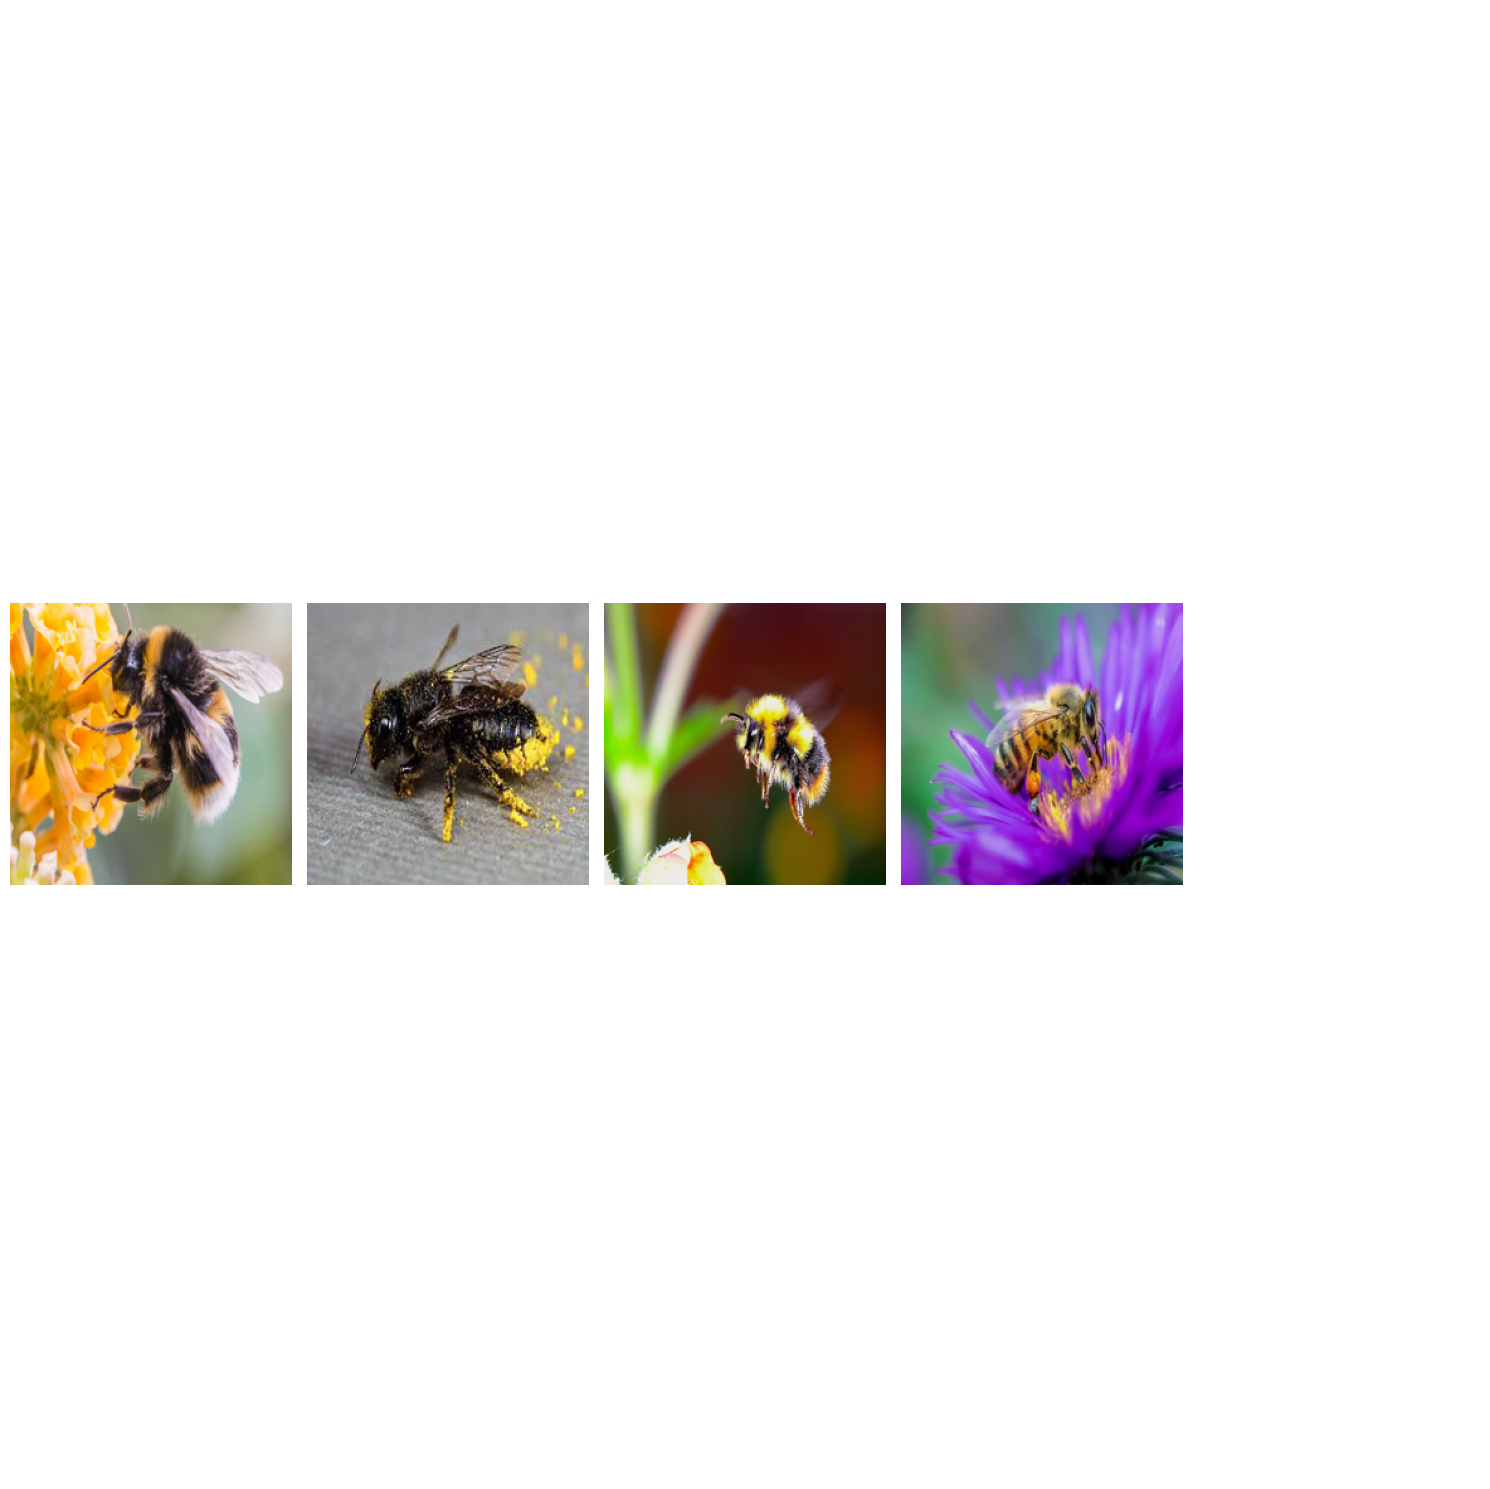

In [5]:
import matplotlib.pyplot as plt

def visualize_images(images_list):
    """
    Visualize the images in the provided list.

    :param images_list: List of images (numpy arrays) to visualize.
    """
    num_images = len(images_list)
    
    # Define the number of columns for subplots
    n_cols = 5
    n_rows = int(num_images / n_cols) + (num_images % n_cols > 0)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    axes = axes.ravel()  # Flatten axes

    # Loop through images and display
    for i in range(n_cols * n_rows):
        if i < num_images:
            axes[i].imshow(images_list[i][0])  # Since images have been expanded on axis 0, use index [0] to get the image
            axes[i].axis('off')
        else:
            # Turn off the axis for empty subplots
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Now call the function
visualize_images(images_list)


In [6]:
class_names =  [   'antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly',
    'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow',
    'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 
    'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 
    'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 
    'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 
    'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 
    'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 
    'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 
    'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 
    'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 
    'wombat', 'woodpecker', 'zebra'
]

# Using explainer

1/1 [==============================] - 0s 311ms/step


Partition explainer:  75%|███████▌  | 3/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 300ms/step


Partition explainer: 5it [00:17,  8.65s/it]               


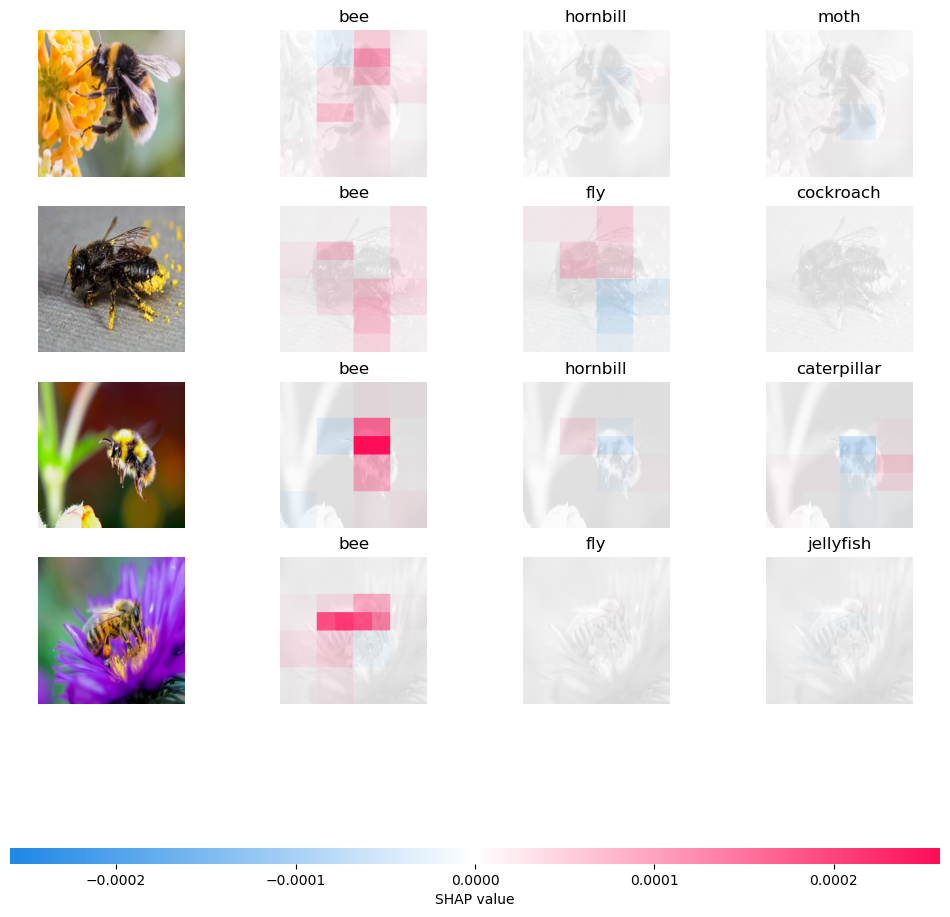

In [10]:
images_list_shap = [np.squeeze(img) for img in images_list]
images_list_shap = np.array(images_list_shap)

masker = shap.maskers.Image(mask_value="blur(128, 128)", 
                            shape=images_list_shap[0].shape)

explainer = shap.Explainer(model=model.predict, 
                           masker=masker, 
                           algorithm="auto", 
                           output_names=class_names)

def plot_shap_values(imgs_to_explain, max_evals):
    shap_values = explainer(imgs_to_explain, max_evals=max_evals, outputs=shap.Explanation.argsort.flip[:3])
    shap.image_plot(shap_values=shap_values, show=False)

plot_shap_values(imgs_to_explain=images_list_shap, max_evals=1000)

In [8]:
for img in images_list:
    print(img.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
